In [1]:
from matplotlib import pyplot as plt

# Example - 1

In [ ]:
class Graph:
  def __init__(self):
    self.graph = dict()
    self.coordinate = dict()
  def addEdge(self,src,srcCoord,dst,dstCoord,cost):
    if src not in self.graph:
      self.graph[src] = []
      self.coordinate[src] = srcCoord
    if dst not in self.graph:
      self.graph[dst] = []
      self.coordinate[dst] = dstCoord
    self.graph[src].append([dst,cost])
    self.graph[dst].append([src,cost])
  def hillClimb(self,start):
    cur_cost = 0
    pre_cost = -1
    path = []
    path.append(start)
    node = start
    while pre_cost != cur_cost:
      pre_cost = cur_cost
      for neighbor in self.graph[node]:
        if int(neighbor[1]) > int(cur_cost):
          cur_cost = neighbor[1]
          node = neighbor[0]
          path.append(node)
    return path
  def plotGraph(self):
    for nodes in self.coordinate:
      plt.scatter(self.coordinate[nodes][0],self.coordinate[nodes][1])
    plt.show()
  def printGraph(self):
    for s in self.graph:
      print(f"{s} --> {self.graph[s]}")

In [ ]:
g = Graph()
with open("input.txt","r") as fp:
  lines = fp.readlines()
for l in lines:
  src,x1,y1,dst,x2,y2,cost = l.split()
  g.addEdge(src,(x1,y1),dst,(x2,y2),cost)

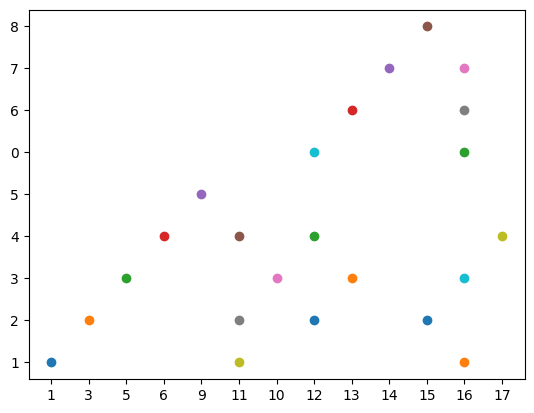

In [ ]:
g.plotGraph()

In [ ]:
g.printGraph()

A --> [['B', '1']]
B --> [['A', '1'], ['C', '2']]
C --> [['B', '2'], ['D', '3']]
D --> [['C', '3'], ['E', '4']]
E --> [['D', '4'], ['F', '3']]
F --> [['E', '3'], ['G', '2']]
G --> [['F', '2'], ['H', '1']]
H --> [['G', '1'], ['I', '0']]
I --> [['H', '0'], ['J', '1']]
J --> [['I', '1'], ['K', '2']]
K --> [['J', '2'], ['L', '3']]
L --> [['K', '3'], ['M', '4']]
M --> [['L', '4'], ['N', '5']]
N --> [['M', '5'], ['O', '6']]
O --> [['N', '6'], ['P', '7']]
P --> [['O', '7'], ['Q', '6']]
Q --> [['P', '6'], ['R', '5']]
R --> [['Q', '5'], ['S', '4']]
S --> [['R', '4'], ['T', '3']]
T --> [['S', '3'], ['U', '2']]
U --> [['T', '2'], ['V', '1']]
V --> [['U', '1'], ['W', '0']]
W --> [['V', '0']]


In [ ]:
start = 'J'
path = g.hillClimb(start)
print(path)

['J', 'I', 'K', 'L', 'M', 'N', 'O', 'P']


# Example - 2

In [6]:
def calc_cost(state):
  sum = 0
  for i in range(len(state)):
    for j in range(i+1,len(state)):
      if state[i]>state[j]:
        sum = sum + 1
  return sum

In [7]:
def goal_test(state):
  if calc_cost(state)==0:
    return True
  else:
    return False

In [52]:
def state_generation(state,cost):
  min_node = state
  min_cost = 999 #To find a minimum we assign a large number
  node = state
  for i in range(len(state)):
    for j in range(i+1,len(state)):
      node[i], node[j] = node[j],node[i]
      cur_cost = calc_cost(node)
      if cur_cost < min_cost:
        min_node = [node[k] for k in range(len(node))]
        min_cost = cur_cost
      node[i], node[j] = node[j],node[i]
  if min_cost<cost:
    return min_node,min_cost
  else:
    return state, None

In [53]:
def hill_climb(state):
  cur_cost = calc_cost(state)
  while goal_test(state) == False:
    state,cur_cost = state_generation(state,cur_cost)
    if cur_cost is None:
      return state
  return state

In [54]:
arr = [2,1,5,0,8, 4, 10, 0, 20, 10]
state = hill_climb(arr)

In [55]:
print(state)

[0, 0, 1, 2, 4, 5, 8, 10, 10, 20]


# Hill climbing with simulated Annealing

In [1]:
import math
import random

In [2]:
def moveOrNot(delE):
  e = math.exp(delE)
  p = random.random()
  if 0<= p <=e:
    return True
  else:
    return False

In [28]:
def state_gen(state,cost):
  node = state
  for i in range(len(state)):
    for j in range(i+1,len(state)):
      node[i], node[j] = node[j], node[i]
      cur_cost = calc_cost(node)
      if cur_cost<cost:
        cost = cur_cost
        continue
      elif cur_cost>cost:
        deltaE = cost - cur_cost
        if moveOrNot(deltaE):
          cost = cur_cost
          continue
      else:
        deltaE = -1
        if moveOrNot(deltaE):
          cost = cur_cost
          continue
      node[i], node[j] = node[j], node[i]
  return node,cost

In [29]:
def HCSA(state):
  cur_cost = calc_cost(state)
  while not goal_test(state):
    state, cur_cost = state_gen(state,cur_cost)
    #print(f'state:{state} cost:{cur_cost}')
    if cur_cost == 0:
      return state
  return state

In [32]:
arr = [2,1,5,0,8, 4, 10, 0, 20, 10]
print(HCSA(arr))

state:[0, 0, 1, 2, 4, 10, 5, 8, 10, 20] cost:2
state:[0, 0, 4, 1, 10, 5, 2, 8, 20, 10] cost:7
state:[0, 2, 1, 0, 10, 8, 4, 5, 10, 20] cost:8
state:[0, 1, 4, 0, 5, 8, 10, 2, 10, 20] cost:6
state:[0, 2, 0, 1, 4, 10, 20, 5, 8, 10] cost:7
state:[0, 1, 0, 2, 8, 5, 4, 10, 10, 20] cost:4
state:[0, 1, 0, 4, 5, 2, 8, 10, 10, 20] cost:3
state:[0, 2, 0, 1, 4, 8, 10, 10, 5, 20] cost:5
state:[0, 0, 1, 5, 2, 4, 8, 20, 10, 10] cost:4
state:[0, 0, 1, 4, 2, 5, 8, 10, 10, 20] cost:1
state:[0, 0, 2, 1, 4, 5, 10, 8, 10, 20] cost:2
state:[0, 0, 1, 2, 8, 4, 5, 10, 10, 20] cost:2
state:[2, 0, 5, 0, 4, 1, 8, 10, 20, 10] cost:8
state:[1, 0, 0, 4, 2, 8, 10, 5, 10, 20] cost:5
state:[0, 0, 1, 2, 5, 4, 10, 8, 20, 10] cost:3
state:[0, 2, 0, 1, 4, 10, 8, 10, 5, 20] cost:6
state:[1, 0, 0, 5, 2, 8, 4, 10, 10, 20] cost:5
state:[0, 0, 1, 4, 2, 5, 8, 10, 10, 20] cost:1
state:[2, 0, 0, 1, 4, 10, 8, 5, 10, 20] cost:6
state:[0, 0, 1, 4, 5, 2, 8, 10, 20, 10] cost:3
state:[0, 2, 1, 4, 0, 5, 10, 10, 20, 8] cost:7
state:[0, 0, 